## HR Analytics: Job Change of Data Scientist

# Classification

## 1. Introduction

### 1.1. Motivation

In this work, I will perform classification process with machine learning algorithms using a dataframe that is prepared a careful data cleaning process. <b>Logistic Regression, Gaussian Naive Bayes, KNeighbors, SVC, Neural Network (MLP), DecisionTreeClassifier, Random Forests, GradientBoosting, XGBoost, LightGBM, CatBoost</b> and <b>Perceptron</b> algorithms are created and tuned.

Data Cleaning and Imputation processes are explained here: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/data-collection-merging-and-cleaning/data-cleaning-for-hr-classification.ipynb

### 1.2. Data Context

"A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment."

The data can be found here: https://www.kaggle.com/datasets/uniabhi/hr-analytics-job-change-of-data-scientists

## 2. Classification Process

### 2.1. Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [271]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale, StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("hr_df.csv")

In [3]:
df.head()

,enrollee_id,city_development_index,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,enrolled_university_o_enrollment,education_level_High School,...,experience_19,experience_20,experience_>20,experience_No experience,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_>4,target,label
0,8949,0.920,36.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,train
1,29725,0.776,47.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,train
2,11561,0.624,83.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
3,33241,0.789,52.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,train
4,666,0.767,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,train


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21241 entries, 0 to 21240
Data columns (total 47 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   enrollee_id                                 21241 non-null  int64  
 1   city_development_index                      21241 non-null  float64
 2   training_hours                              21241 non-null  float64
 3   gender_Male                                 21241 non-null  float64
 4   gender_Other                                21241 non-null  float64
 5   relevent_experience_No relevent experience  21241 non-null  float64
 6   enrolled_university_Part time course        21241 non-null  float64
 7   enrolled_university_no_enrollment           21241 non-null  float64
 8   enrolled_university_o_enrollment            21241 non-null  float64
 9   education_level_High School                 21241 non-null  float64
 10  education_

In [22]:
df_train = df[df["label"] == "train"]

In [23]:
X = df_train.drop(["enrollee_id", "target", "label"],axis=1)

In [25]:
y = df_train["target"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

<br>I will train our models with 80% of the labeled data and calculate accuracy scores with the remaining 20%.

<br><br><br>

### 2.2. Machine Learning

In this section, I perform various algorithms for classification with machine learning. 

**Evaluation**

<li>The accuracy scores will be saved for comparison at the end of the section.
<li>Our problem is to hire the candidates who will not quit. Therefore, our main concern should be not hiring these candidates rather than not missing other candidates. Consequently, we should focus on <b>Type II error (False Negative)</b> that is hiring potential quitters (labeling "target" for candidates as "0" which should be "1"). So we will also record them for later evaluation.
<li> Another performance metric we can use is <b>Precision</b> that is True Positive/Predicted Positive. A model can find all values as positive, so that may leave no candidates looking for a job change, however, that is not we would want.

**Null Hypothesis:** Candidate is not looking for a job change. 

<br>

In [200]:
results = pd.DataFrame(columns=["Model", "Accuracy Score", "Type II Error", "Precision"])

#### 2.2.1. Logistic Regression

**Model**

In [201]:
regressor = LogisticRegression()

In [202]:
model = regressor.fit(X_train, y_train)

In [203]:
y_pred = model.predict(X_test)

In [204]:
accuracy_score(y_test, y_pred)

0.76092074287209

In [205]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85      2839
         1.0       0.59      0.24      0.34       984

    accuracy                           0.76      3823
   macro avg       0.68      0.59      0.60      3823
weighted avg       0.73      0.76      0.72      3823



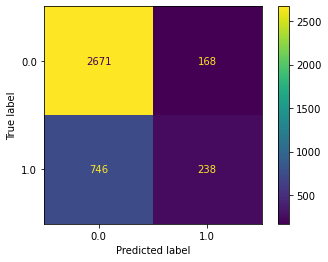

In [206]:
plot_confusion_matrix(model,X_test,y_test)

In [207]:
results = results.append({"Model": str(model), 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

<br><br>**Model Tuning**

In [208]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [209]:
param_grid = {'C': [0.8,1.0,1.2],
             'class_weight': [None,"balanced"],
             'multi_class': ['auto','ovr', 'multinomial'],
             'penalty': ['l2','elasticnet'],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [210]:
cv_model = RandomizedSearchCV(model, param_grid, cv=5)
cv_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.8, 1.0, 1.2],
                                        'class_weight': [None, 'balanced'],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [211]:
cv_model.best_params_

{'solver': 'sag',
 'penalty': 'l2',
 'multi_class': 'ovr',
 'class_weight': None,
 'C': 0.8}

In [212]:
y_pred = cv_model.predict(X_test)

In [213]:
accuracy_score(y_test, y_pred)

0.7475804342139681

In [214]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.99      0.85      2839
         1.0       0.63      0.05      0.09       984

    accuracy                           0.75      3823
   macro avg       0.69      0.52      0.47      3823
weighted avg       0.72      0.75      0.66      3823



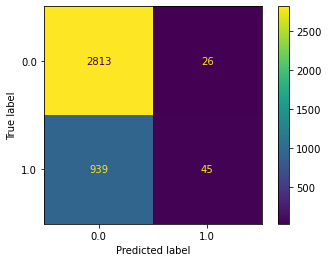

In [215]:
plot_confusion_matrix(cv_model,X_test,y_test)

In [216]:
results = results.append({"Model": str(model)+"_tuned", 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

In [217]:
results

,Model,Accuracy Score,Type II Error,Precision
0,LogisticRegression(),0.760921,746,0.78168
1,LogisticRegression()_tuned,0.74758,939,0.749733


<br><br><br>

#### 2.2.2. Gaussian Naive Bayes

**Model**

In [218]:
regressor = GaussianNB()

In [219]:
model = regressor.fit(X_train, y_train)

In [220]:
y_pred = model.predict(X_test)

In [221]:
accuracy_score(y_test, y_pred)

0.6332722992414335

In [222]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.64      0.72      2839
         1.0       0.37      0.62      0.47       984

    accuracy                           0.63      3823
   macro avg       0.60      0.63      0.59      3823
weighted avg       0.71      0.63      0.66      3823



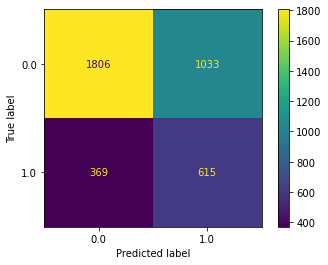

In [223]:
plot_confusion_matrix(model,X_test,y_test)

In [224]:
results = results.append({"Model": str(model), 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

<br><br>**Model Tuning**

In [225]:
model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [226]:
param_grid = {'var_smoothing': [10**(-10),10**(-9), 10**(-8)]}

In [227]:
cv_model = RandomizedSearchCV(model, param_grid, cv=5)
cv_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GaussianNB(),
                   param_distributions={'var_smoothing': [1e-10, 1e-09, 1e-08]})

In [228]:
cv_model.best_params_

{'var_smoothing': 1e-08}

In [229]:
y_pred = cv_model.predict(X_test)

In [230]:
accuracy_score(y_test, y_pred)

0.6332722992414335

In [231]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.64      0.72      2839
         1.0       0.37      0.62      0.47       984

    accuracy                           0.63      3823
   macro avg       0.60      0.63      0.59      3823
weighted avg       0.71      0.63      0.66      3823



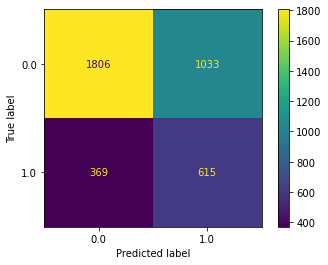

In [232]:
plot_confusion_matrix(cv_model,X_test,y_test)

In [233]:
results = results.append({"Model": str(model)+"_tuned", 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

In [234]:
results

,Model,Accuracy Score,Type II Error,Precision
0,LogisticRegression(),0.760921,746,0.78168
1,LogisticRegression()_tuned,0.74758,939,0.749733
2,GaussianNB(),0.633272,369,0.830345
3,GaussianNB()_tuned,0.633272,369,0.830345


<br><br><br>

#### 2.2.3. KNeighbors

**Model**

In [235]:
regressor = KNeighborsClassifier()

In [236]:
model = regressor.fit(X_train, y_train)

In [237]:
y_pred = model.predict(X_test)

In [238]:
accuracy_score(y_test, y_pred)

0.7214229662568663

In [239]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.90      0.83      2839
         1.0       0.41      0.19      0.26       984

    accuracy                           0.72      3823
   macro avg       0.59      0.55      0.55      3823
weighted avg       0.67      0.72      0.68      3823



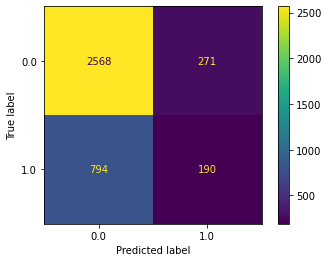

In [240]:
plot_confusion_matrix(model,X_test,y_test)

In [241]:
results = results.append({"Model": str(model), 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

<br><br>**Model Tuning**

In [243]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [244]:
param_grid = {'n_neighbors': [3,5,10,20,30],
             'weights': ['uniform','distance']}

In [245]:
cv_model = RandomizedSearchCV(model, param_grid, cv=5)
cv_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [3, 5, 10, 20, 30],
                                        'weights': ['uniform', 'distance']})

In [246]:
cv_model.best_params_

{'weights': 'uniform', 'n_neighbors': 30}

<br>**Decision:** The best parameter is also the maximum value we have given. So we should check greater values. <br><br>

In [247]:
param_grid = {'n_neighbors': [30,40,50,60,100]}

In [248]:
cv_model = RandomizedSearchCV(model, param_grid, cv=5)
cv_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [30, 40, 50, 60, 100]})

In [249]:
cv_model.best_params_

{'n_neighbors': 40}

In [250]:
y_pred = cv_model.predict(X_test)

In [251]:
accuracy_score(y_test, y_pred)

0.7426105153021187

In [252]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.99      0.85      2839
         1.0       0.50      0.02      0.05       984

    accuracy                           0.74      3823
   macro avg       0.62      0.51      0.45      3823
weighted avg       0.68      0.74      0.64      3823



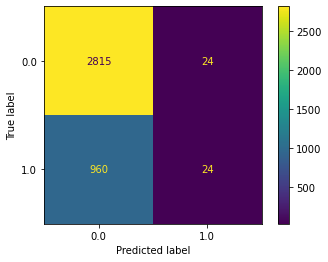

In [253]:
plot_confusion_matrix(cv_model,X_test,y_test)

In [254]:
results = results.append({"Model": str(model)+"_tuned", 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

In [255]:
results

,Model,Accuracy Score,Type II Error,Precision
0,LogisticRegression(),0.760921,746,0.78168
1,LogisticRegression()_tuned,0.74758,939,0.749733
2,GaussianNB(),0.633272,369,0.830345
3,GaussianNB()_tuned,0.633272,369,0.830345
4,KNeighborsClassifier(),0.721423,794,0.763831
5,KNeighborsClassifier()_tuned,0.742611,960,0.745695


<br><br><br>

#### 2.2.4. SVC (Support Vector Machines)

**Model**

In [256]:
regressor = SVC()

In [257]:
model = regressor.fit(X_train, y_train)

In [258]:
y_pred = model.predict(X_test)

In [259]:
accuracy_score(y_test, y_pred)

0.7426105153021187

In [260]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      2839
         1.0       0.00      0.00      0.00       984

    accuracy                           0.74      3823
   macro avg       0.37      0.50      0.43      3823
weighted avg       0.55      0.74      0.63      3823



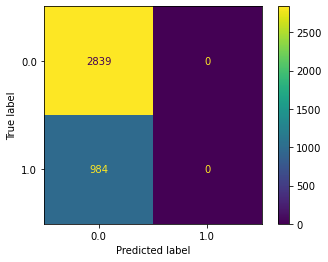

In [261]:
plot_confusion_matrix(model,X_test,y_test)

In [262]:
results = results.append({"Model": str(model), 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

<br>**Note that:** SVC predicted all values as "0".

<br><br>**Model Tuning**

In [263]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [269]:
param_grid = {'kernel': ['linear', 'rbf']}

In [270]:
cv_model = RandomizedSearchCV(model, param_grid, cv=5)
cv_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'kernel': ['linear', 'rbf']})

In [272]:
cv_model.best_params_

{'kernel': 'linear'}

In [273]:
y_pred = cv_model.predict(X_test)

In [274]:
accuracy_score(y_test, y_pred)

0.7426105153021187

In [275]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      2839
         1.0       0.00      0.00      0.00       984

    accuracy                           0.74      3823
   macro avg       0.37      0.50      0.43      3823
weighted avg       0.55      0.74      0.63      3823



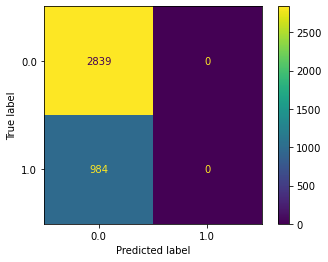

In [276]:
plot_confusion_matrix(cv_model,X_test,y_test)

In [277]:
results = results.append({"Model": str(model)+"_tuned", 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

In [278]:
results

,Model,Accuracy Score,Type II Error,Precision
0,LogisticRegression(),0.760921,746,0.78168
1,LogisticRegression()_tuned,0.74758,939,0.749733
2,GaussianNB(),0.633272,369,0.830345
3,GaussianNB()_tuned,0.633272,369,0.830345
4,KNeighborsClassifier(),0.721423,794,0.763831
5,KNeighborsClassifier()_tuned,0.742611,960,0.745695
6,SVC(),0.742611,984,0.742611
7,SVC()_tuned,0.742611,984,0.742611


<br><br><br>

#### 2.2.5. Neural Network (MLP)

**Model**

In [281]:
scaler = StandardScaler()

In [282]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [283]:
regressor = MLPClassifier()

In [284]:
model = regressor.fit(X_train_scaled, y_train)

In [285]:
y_pred = model.predict(X_test_scaled)

In [286]:
accuracy_score(y_test, y_pred)

0.7350248495945593

In [287]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83      2839
         1.0       0.48      0.32      0.38       984

    accuracy                           0.74      3823
   macro avg       0.63      0.60      0.61      3823
weighted avg       0.71      0.74      0.72      3823



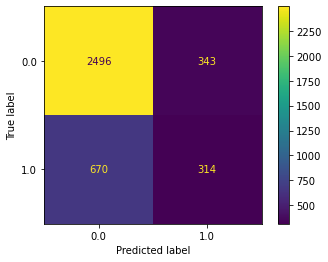

In [288]:
plot_confusion_matrix(model,X_test_scaled,y_test)

In [289]:
results = results.append({"Model": str(model), 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

<br><br>**Model Tuning**

In [290]:
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [291]:
param_grid = {"alpha": [0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [293]:
cv_model = RandomizedSearchCV(model, param_grid, cv=3)
cv_model.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, estimator=MLPClassifier(),
                   param_distributions={'activation': ['relu', 'logistic'],
                                        'alpha': [0.005, 0.0001, 1e-05],
                                        'hidden_layer_sizes': [(10, 10, 10),
                                                               (100, 100, 100),
                                                               (100, 100)],
                                        'solver': ['lbfgs', 'adam', 'sgd']})

In [294]:
cv_model.best_params_

{'solver': 'sgd',
 'hidden_layer_sizes': (10, 10, 10),
 'alpha': 0.0001,
 'activation': 'relu'}

In [295]:
y_pred = cv_model.predict(X_test_scaled)

In [296]:
accuracy_score(y_test, y_pred)

0.7567355479989537

In [297]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85      2839
         1.0       0.55      0.31      0.39       984

    accuracy                           0.76      3823
   macro avg       0.67      0.61      0.62      3823
weighted avg       0.73      0.76      0.73      3823



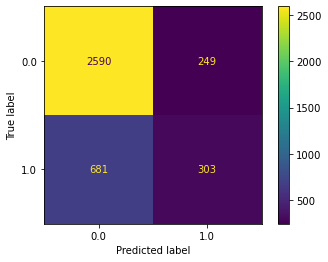

In [298]:
plot_confusion_matrix(cv_model,X_test_scaled,y_test)

In [299]:
results = results.append({"Model": str(model)+"_tuned", 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

In [300]:
results

,Model,Accuracy Score,Type II Error,Precision
0,LogisticRegression(),0.760921,746,0.78168
1,LogisticRegression()_tuned,0.74758,939,0.749733
2,GaussianNB(),0.633272,369,0.830345
3,GaussianNB()_tuned,0.633272,369,0.830345
4,KNeighborsClassifier(),0.721423,794,0.763831
5,KNeighborsClassifier()_tuned,0.742611,960,0.745695
6,SVC(),0.742611,984,0.742611
7,SVC()_tuned,0.742611,984,0.742611
8,MLPClassifier(),0.735025,670,0.788377
9,MLPClassifier()_tuned,0.756736,681,0.791807


<br><br><br>

#### 2.2.6. DecisionTreeClassifier

**Model**

In [301]:
regressor = DecisionTreeClassifier()

In [302]:
model = regressor.fit(X_train, y_train)

In [303]:
y_pred = model.predict(X_test)

In [304]:
accuracy_score(y_test, y_pred)

0.6819251896416427

In [305]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.79      0.79      2839
         1.0       0.38      0.36      0.37       984

    accuracy                           0.68      3823
   macro avg       0.58      0.58      0.58      3823
weighted avg       0.68      0.68      0.68      3823



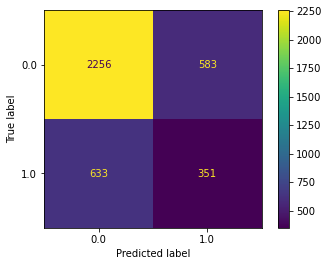

In [306]:
plot_confusion_matrix(model,X_test,y_test)

In [307]:
results = results.append({"Model": str(model), 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

<br><br>**Model Tuning**

In [308]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [309]:
param_grid = {"max_depth": [1,5,10],
            "min_samples_split" : [2,5,10]}

In [310]:
cv_model = RandomizedSearchCV(model, param_grid, cv=5)
cv_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10]})

In [311]:
cv_model.best_params_

{'min_samples_split': 2, 'max_depth': 1}

In [312]:
y_pred = cv_model.predict(X_test)

In [313]:
accuracy_score(y_test, y_pred)

0.7724300287732148

In [314]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      2839
         1.0       0.59      0.39      0.47       984

    accuracy                           0.77      3823
   macro avg       0.70      0.65      0.66      3823
weighted avg       0.75      0.77      0.76      3823



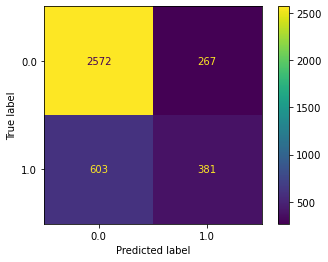

In [315]:
plot_confusion_matrix(cv_model,X_test,y_test)

In [316]:
results = results.append({"Model": str(model)+"_tuned", 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

In [317]:
results

,Model,Accuracy Score,Type II Error,Precision
0,LogisticRegression(),0.760921,746,0.78168
1,LogisticRegression()_tuned,0.74758,939,0.749733
2,GaussianNB(),0.633272,369,0.830345
3,GaussianNB()_tuned,0.633272,369,0.830345
4,KNeighborsClassifier(),0.721423,794,0.763831
5,KNeighborsClassifier()_tuned,0.742611,960,0.745695
6,SVC(),0.742611,984,0.742611
7,SVC()_tuned,0.742611,984,0.742611
8,MLPClassifier(),0.735025,670,0.788377
9,MLPClassifier()_tuned,0.756736,681,0.791807


<br><br><br>

#### 2.2.7. Random Forests

**Model**

In [318]:
regressor = RandomForestClassifier()

In [319]:
model = regressor.fit(X_train, y_train)

In [320]:
y_pred = model.predict(X_test)

In [321]:
accuracy_score(y_test, y_pred)

0.7402563431859795

In [322]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84      2839
         1.0       0.49      0.32      0.39       984

    accuracy                           0.74      3823
   macro avg       0.64      0.60      0.61      3823
weighted avg       0.71      0.74      0.72      3823



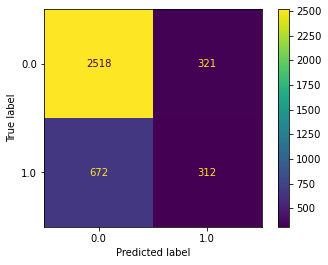

In [323]:
plot_confusion_matrix(model,X_test,y_test)

In [324]:
results = results.append({"Model": str(model), 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

<br><br>**Model Tuning**

In [325]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [326]:
param_grid = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [327]:
cv_model = RandomizedSearchCV(model, param_grid, cv=5)
cv_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 5, 8, 10],
                                        'max_features': [2, 5, 8],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 500, 1000]})

In [328]:
cv_model.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'max_features': 8,
 'max_depth': 10}

In [329]:
y_pred = cv_model.predict(X_test)

In [330]:
accuracy_score(y_test, y_pred)

0.7671985351817944

In [331]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85      2839
         1.0       0.58      0.34      0.43       984

    accuracy                           0.77      3823
   macro avg       0.69      0.63      0.64      3823
weighted avg       0.74      0.77      0.74      3823



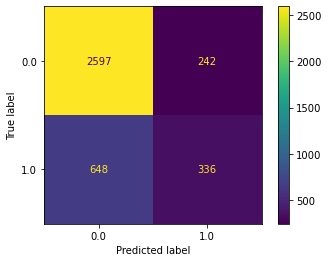

In [332]:
plot_confusion_matrix(cv_model,X_test,y_test)

In [333]:
results = results.append({"Model": str(model)+"_tuned", 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

In [334]:
results

,Model,Accuracy Score,Type II Error,Precision
0,LogisticRegression(),0.760921,746,0.78168
1,LogisticRegression()_tuned,0.74758,939,0.749733
2,GaussianNB(),0.633272,369,0.830345
3,GaussianNB()_tuned,0.633272,369,0.830345
4,KNeighborsClassifier(),0.721423,794,0.763831
5,KNeighborsClassifier()_tuned,0.742611,960,0.745695
6,SVC(),0.742611,984,0.742611
7,SVC()_tuned,0.742611,984,0.742611
8,MLPClassifier(),0.735025,670,0.788377
9,MLPClassifier()_tuned,0.756736,681,0.791807


<br><br><br>

#### 2.2.8. GradientBoosting

**Model**

In [335]:
regressor = GradientBoostingClassifier()

In [336]:
model = regressor.fit(X_train, y_train)

In [337]:
y_pred = model.predict(X_test)

In [338]:
accuracy_score(y_test, y_pred)

0.7661522364635104

In [339]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85      2839
         1.0       0.57      0.35      0.44       984

    accuracy                           0.77      3823
   macro avg       0.69      0.63      0.65      3823
weighted avg       0.74      0.77      0.75      3823



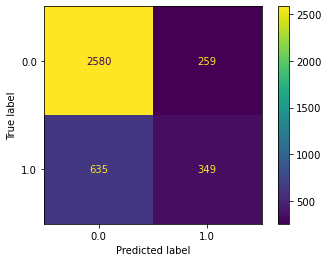

In [340]:
plot_confusion_matrix(model,X_test,y_test)

In [341]:
results = results.append({"Model": str(model), 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

<br><br>**Model Tuning**

In [342]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [343]:
param_grid = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [344]:
cv_model = RandomizedSearchCV(model, param_grid, cv=5)
cv_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.05],
                                        'max_depth': [3, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 500, 100]})

In [345]:
cv_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'max_depth': 3,
 'learning_rate': 0.05}

In [346]:
y_pred = cv_model.predict(X_test)

In [347]:
accuracy_score(y_test, y_pred)

0.7679832592205075

In [348]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85      2839
         1.0       0.58      0.35      0.44       984

    accuracy                           0.77      3823
   macro avg       0.69      0.63      0.65      3823
weighted avg       0.75      0.77      0.75      3823



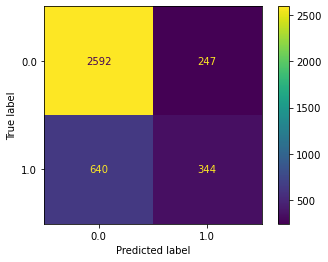

In [349]:
plot_confusion_matrix(cv_model,X_test,y_test)

In [350]:
results = results.append({"Model": str(model)+"_tuned", 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

In [351]:
results

,Model,Accuracy Score,Type II Error,Precision
0,LogisticRegression(),0.760921,746,0.78168
1,LogisticRegression()_tuned,0.74758,939,0.749733
2,GaussianNB(),0.633272,369,0.830345
3,GaussianNB()_tuned,0.633272,369,0.830345
4,KNeighborsClassifier(),0.721423,794,0.763831
5,KNeighborsClassifier()_tuned,0.742611,960,0.745695
6,SVC(),0.742611,984,0.742611
7,SVC()_tuned,0.742611,984,0.742611
8,MLPClassifier(),0.735025,670,0.788377
9,MLPClassifier()_tuned,0.756736,681,0.791807


<br><br><br>

#### 2.2.9. XGBoost

**Model**

In [352]:
regressor = XGBClassifier()

In [353]:
model = regressor.fit(X_train, y_train)

In [354]:
y_pred = model.predict(X_test)

In [355]:
accuracy_score(y_test, y_pred)

0.7580434213968088

In [356]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85      2839
         1.0       0.55      0.36      0.43       984

    accuracy                           0.76      3823
   macro avg       0.67      0.63      0.64      3823
weighted avg       0.74      0.76      0.74      3823



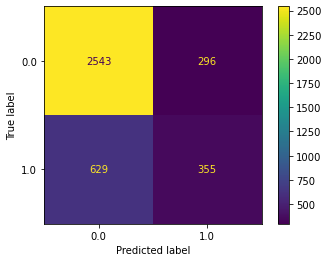

In [357]:
plot_confusion_matrix(model,X_test,y_test)

In [358]:
results = results.append({"Model": str(model), 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

<br><br>**Model Tuning**

In [359]:
model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [360]:
param_grid = {'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [ ]:
cv_model = RandomizedSearchCV(model, param_grid, cv=5)
cv_model.fit(X_train, y_train)

In [362]:
cv_model.best_params_

{'subsample': 0.8,
 'n_estimators': 500,
 'min_samples_split': 10,
 'max_depth': 3,
 'learning_rate': 0.01}

In [363]:
y_pred = cv_model.predict(X_test)

In [364]:
accuracy_score(y_test, y_pred)

0.7682448339000785

In [365]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85      2839
         1.0       0.58      0.35      0.44       984

    accuracy                           0.77      3823
   macro avg       0.69      0.63      0.65      3823
weighted avg       0.75      0.77      0.75      3823



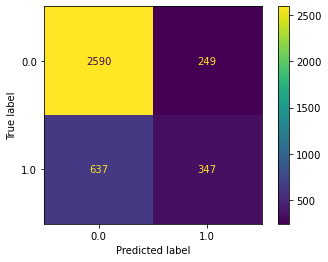

In [366]:
plot_confusion_matrix(cv_model,X_test,y_test)

In [367]:
results = results.append({"Model": str(model)+"_tuned", 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

In [368]:
results

,Model,Accuracy Score,Type II Error,Precision
0,LogisticRegression(),0.760921,746,0.78168
1,LogisticRegression()_tuned,0.74758,939,0.749733
2,GaussianNB(),0.633272,369,0.830345
3,GaussianNB()_tuned,0.633272,369,0.830345
4,KNeighborsClassifier(),0.721423,794,0.763831
5,KNeighborsClassifier()_tuned,0.742611,960,0.745695
6,SVC(),0.742611,984,0.742611
7,SVC()_tuned,0.742611,984,0.742611
8,MLPClassifier(),0.735025,670,0.788377
9,MLPClassifier()_tuned,0.756736,681,0.791807


<br><br><br>

#### 2.2.10. LightGBM

**Model**

In [369]:
regressor = LGBMClassifier()

In [370]:
model = regressor.fit(X_train, y_train)

In [371]:
y_pred = model.predict(X_test)

In [372]:
accuracy_score(y_test, y_pred)

0.7658906617839393

In [373]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      2839
         1.0       0.56      0.39      0.46       984

    accuracy                           0.77      3823
   macro avg       0.69      0.64      0.66      3823
weighted avg       0.75      0.77      0.75      3823



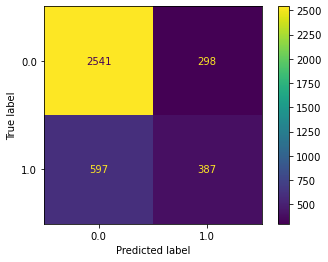

In [374]:
plot_confusion_matrix(model,X_test,y_test)

In [375]:
results = results.append({"Model": str(model), 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

<br><br>**Model Tuning**

In [376]:
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [378]:
param_grid = {'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.2,0.1,0.01],
        "min_child_samples": [5,10,20]}

In [379]:
cv_model = RandomizedSearchCV(model, param_grid, cv=5)
cv_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(),
                   param_distributions={'learning_rate': [0.2, 0.1, 0.01],
                                        'max_depth': [3, 4, 5],
                                        'min_child_samples': [5, 10, 20],
                                        'n_estimators': [100, 500, 1000, 2000],
                                        'subsample': [0.6, 0.8, 1.0]})

In [380]:
cv_model.best_params_

{'subsample': 0.8,
 'n_estimators': 100,
 'min_child_samples': 5,
 'max_depth': 3,
 'learning_rate': 0.1}

In [381]:
y_pred = cv_model.predict(X_test)

In [382]:
accuracy_score(y_test, y_pred)

0.7666753858226524

In [383]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85      2839
         1.0       0.57      0.36      0.44       984

    accuracy                           0.77      3823
   macro avg       0.69      0.63      0.65      3823
weighted avg       0.74      0.77      0.75      3823



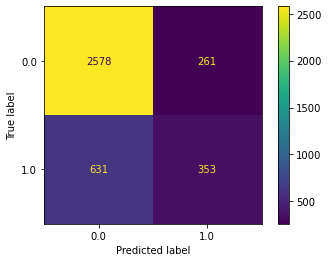

In [384]:
plot_confusion_matrix(cv_model,X_test,y_test)

In [385]:
results = results.append({"Model": str(model)+"_tuned", 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

In [386]:
results

,Model,Accuracy Score,Type II Error,Precision
0,LogisticRegression(),0.760921,746,0.78168
1,LogisticRegression()_tuned,0.74758,939,0.749733
2,GaussianNB(),0.633272,369,0.830345
3,GaussianNB()_tuned,0.633272,369,0.830345
4,KNeighborsClassifier(),0.721423,794,0.763831
5,KNeighborsClassifier()_tuned,0.742611,960,0.745695
6,SVC(),0.742611,984,0.742611
7,SVC()_tuned,0.742611,984,0.742611
8,MLPClassifier(),0.735025,670,0.788377
9,MLPClassifier()_tuned,0.756736,681,0.791807


<br><br><br>

#### 2.2.11. CatBoost

**Model**

In [387]:
regressor = CatBoostClassifier()

In [ ]:
model = regressor.fit(X_train, y_train)

In [389]:
y_pred = model.predict(X_test)

In [390]:
accuracy_score(y_test, y_pred)

0.7624901909495161

In [391]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85      2839
         1.0       0.56      0.36      0.44       984

    accuracy                           0.76      3823
   macro avg       0.68      0.63      0.64      3823
weighted avg       0.74      0.76      0.74      3823



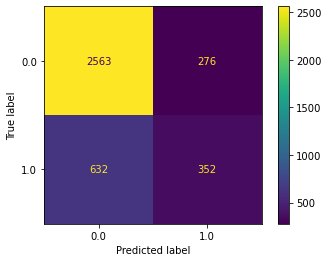

In [392]:
plot_confusion_matrix(model,X_test,y_test)

In [393]:
results = results.append({"Model": str(model), 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

<br><br>**Model Tuning**

In [394]:
model.get_params()

{}

In [395]:
param_grid = {'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8]}

In [ ]:
cv_model = RandomizedSearchCV(model, param_grid, cv=5)
cv_model.fit(X_train, y_train)

In [397]:
cv_model.best_params_

{'learning_rate': 0.01, 'iterations': 500, 'depth': 5}

In [398]:
y_pred = cv_model.predict(X_test)

In [399]:
accuracy_score(y_test, y_pred)

0.7692911326183626

In [400]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85      2839
         1.0       0.58      0.36      0.45       984

    accuracy                           0.77      3823
   macro avg       0.69      0.64      0.65      3823
weighted avg       0.75      0.77      0.75      3823



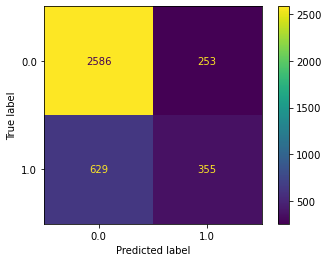

In [401]:
plot_confusion_matrix(cv_model,X_test,y_test)

In [402]:
results = results.append({"Model": str(model)+"_tuned", 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

In [403]:
results

,Model,Accuracy Score,Type II Error,Precision
0,LogisticRegression(),0.760921,746,0.78168
1,LogisticRegression()_tuned,0.74758,939,0.749733
2,GaussianNB(),0.633272,369,0.830345
3,GaussianNB()_tuned,0.633272,369,0.830345
4,KNeighborsClassifier(),0.721423,794,0.763831
5,KNeighborsClassifier()_tuned,0.742611,960,0.745695
6,SVC(),0.742611,984,0.742611
7,SVC()_tuned,0.742611,984,0.742611
8,MLPClassifier(),0.735025,670,0.788377
9,MLPClassifier()_tuned,0.756736,681,0.791807


<br><br><br>

#### 2.2.12. Perceptron

**Model**

In [404]:
regressor = Perceptron()

In [405]:
model = regressor.fit(X_train, y_train)

In [406]:
y_pred = model.predict(X_test)

In [407]:
accuracy_score(y_test, y_pred)

0.7486267329322521

In [408]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.96      0.85      2839
         1.0       0.55      0.14      0.22       984

    accuracy                           0.75      3823
   macro avg       0.65      0.55      0.54      3823
weighted avg       0.71      0.75      0.69      3823



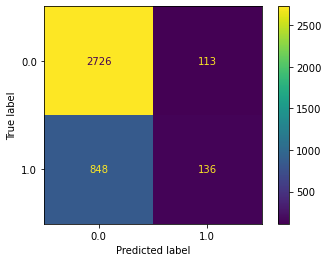

In [409]:
plot_confusion_matrix(model,X_test,y_test)

In [410]:
results = results.append({"Model": str(model), 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

<br><br>**Model Tuning**

In [411]:
model.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [412]:
param_grid = {'alpha': [0.00001,0.0001,0.001],
             'l1_ratio': [0.1,0.15,0.2]}

In [413]:
cv_model = RandomizedSearchCV(model, param_grid, cv=5)
cv_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=Perceptron(),
                   param_distributions={'alpha': [1e-05, 0.0001, 0.001],
                                        'l1_ratio': [0.1, 0.15, 0.2]})

In [414]:
cv_model.best_params_

{'l1_ratio': 0.1, 'alpha': 1e-05}

In [415]:
y_pred = cv_model.predict(X_test)

In [416]:
accuracy_score(y_test, y_pred)

0.7486267329322521

In [417]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.96      0.85      2839
         1.0       0.55      0.14      0.22       984

    accuracy                           0.75      3823
   macro avg       0.65      0.55      0.54      3823
weighted avg       0.71      0.75      0.69      3823



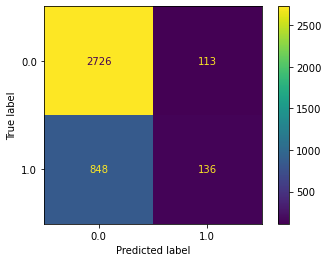

In [418]:
plot_confusion_matrix(cv_model,X_test,y_test)

In [419]:
results = results.append({"Model": str(model)+"_tuned", 
                          "Accuracy Score":accuracy_score(y_test, y_pred),
                         "Type II Error":confusion_matrix(y_test,y_pred)[1][0],
                         "Precision": classification_report(y_test,y_pred, output_dict=True)["0.0"]["precision"]}, ignore_index=True)

In [420]:
results

,Model,Accuracy Score,Type II Error,Precision
0,LogisticRegression(),0.760921,746,0.78168
1,LogisticRegression()_tuned,0.74758,939,0.749733
2,GaussianNB(),0.633272,369,0.830345
3,GaussianNB()_tuned,0.633272,369,0.830345
4,KNeighborsClassifier(),0.721423,794,0.763831
5,KNeighborsClassifier()_tuned,0.742611,960,0.745695
6,SVC(),0.742611,984,0.742611
7,SVC()_tuned,0.742611,984,0.742611
8,MLPClassifier(),0.735025,670,0.788377
9,MLPClassifier()_tuned,0.756736,681,0.791807


<br><br>

## 3. Results & Model Selection

In [426]:
results.sort_values("Accuracy Score", ascending=False)[:10]

,Model,Accuracy Score,Type II Error,Precision
11,DecisionTreeClassifier()_tuned,0.77243,603,0.810079
21,<catboost.core.CatBoostClassifier object at 0x...,0.769291,629,0.804355
17,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.768245,637,0.802603
15,GradientBoostingClassifier()_tuned,0.767983,640,0.80198
13,RandomForestClassifier()_tuned,0.767199,648,0.800308
19,LGBMClassifier()_tuned,0.766675,631,0.803366
14,GradientBoostingClassifier(),0.766152,635,0.802488
18,LGBMClassifier(),0.765891,597,0.809751
20,<catboost.core.CatBoostClassifier object at 0x...,0.76249,632,0.802191
0,LogisticRegression(),0.760921,746,0.78168


In [427]:
results.sort_values("Precision",ascending=False)[:10]

,Model,Accuracy Score,Type II Error,Precision
2,GaussianNB(),0.633272,369,0.830345
3,GaussianNB()_tuned,0.633272,369,0.830345
11,DecisionTreeClassifier()_tuned,0.77243,603,0.810079
18,LGBMClassifier(),0.765891,597,0.809751
21,<catboost.core.CatBoostClassifier object at 0x...,0.769291,629,0.804355
19,LGBMClassifier()_tuned,0.766675,631,0.803366
17,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.768245,637,0.802603
14,GradientBoostingClassifier(),0.766152,635,0.802488
20,<catboost.core.CatBoostClassifier object at 0x...,0.76249,632,0.802191
15,GradientBoostingClassifier()_tuned,0.767983,640,0.80198


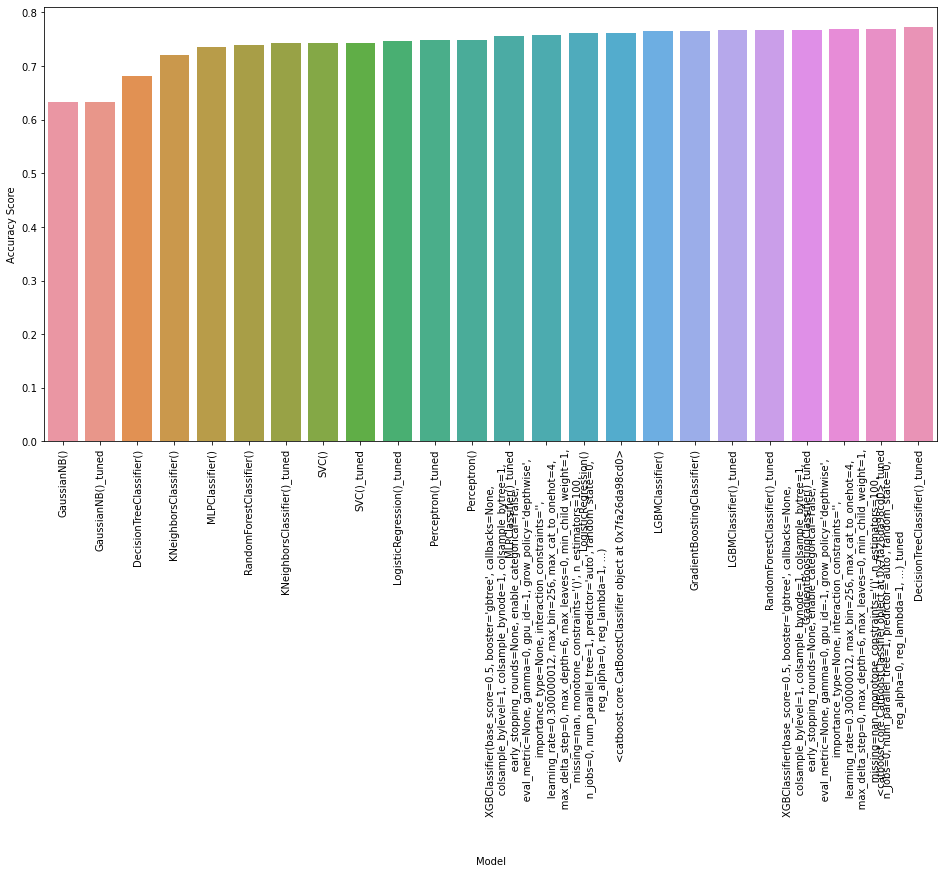

In [429]:
plt.figure(figsize=(16,8))
sns.barplot(data = results.sort_values("Accuracy Score"), x= "Model", y="Accuracy Score")
plt.xticks(rotation=90);

<br><br> **Selecting the best Model**

<br>**Decision:** The model scores are mostly very close. The model selection can change based on the strategy of the company, i.e., how many candidates they will hire, how much cost for each wrong decision is there, etc. We can choose <b>the tuned Decision Tree Classifier</b> because it has the highest accuracy score and the third best precision score or <b>the LGBM Classifier</b> because it has less Type II error and high accuracy score.

**DecisionTreeClassifier**

In [432]:
regressor = DecisionTreeClassifier(min_samples_split= 2, max_depth= 1)

In [433]:
model = regressor.fit(X_train, y_train)

In [434]:
y_pred = model.predict(X_test)

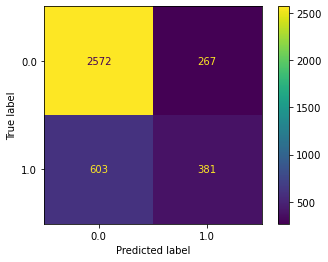

In [436]:
plot_confusion_matrix(model,X_test,y_test)

**LGBM Classifier**

In [441]:
regressor = LGBMClassifier()

In [442]:
model = regressor.fit(X_train, y_train)

In [443]:
y_pred = model.predict(X_test)

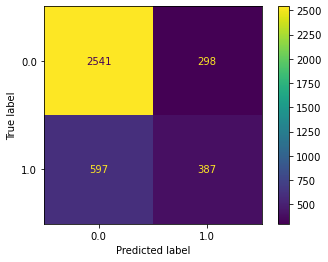

In [444]:
plot_confusion_matrix(model,X_test,y_test)

<br><br> **Feature Importances**

**LGBM Classifier**

In [445]:
imp_feats = pd.DataFrame(data=model.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")

In [446]:
model.feature_importances_

array([680, 990,  44,  88,  88,  26,  85,  29,  36,  82,  54,   8,  14,
        20,   8,  47,  11,  42,  29,  15,  22,  25,  30,  26,  29,  13,
        18,   8,  23,   9,  18,  11,  17,  22,   2,  16,  17,   6,  63,
         0, 112,  53,  30,  34], dtype=int32)

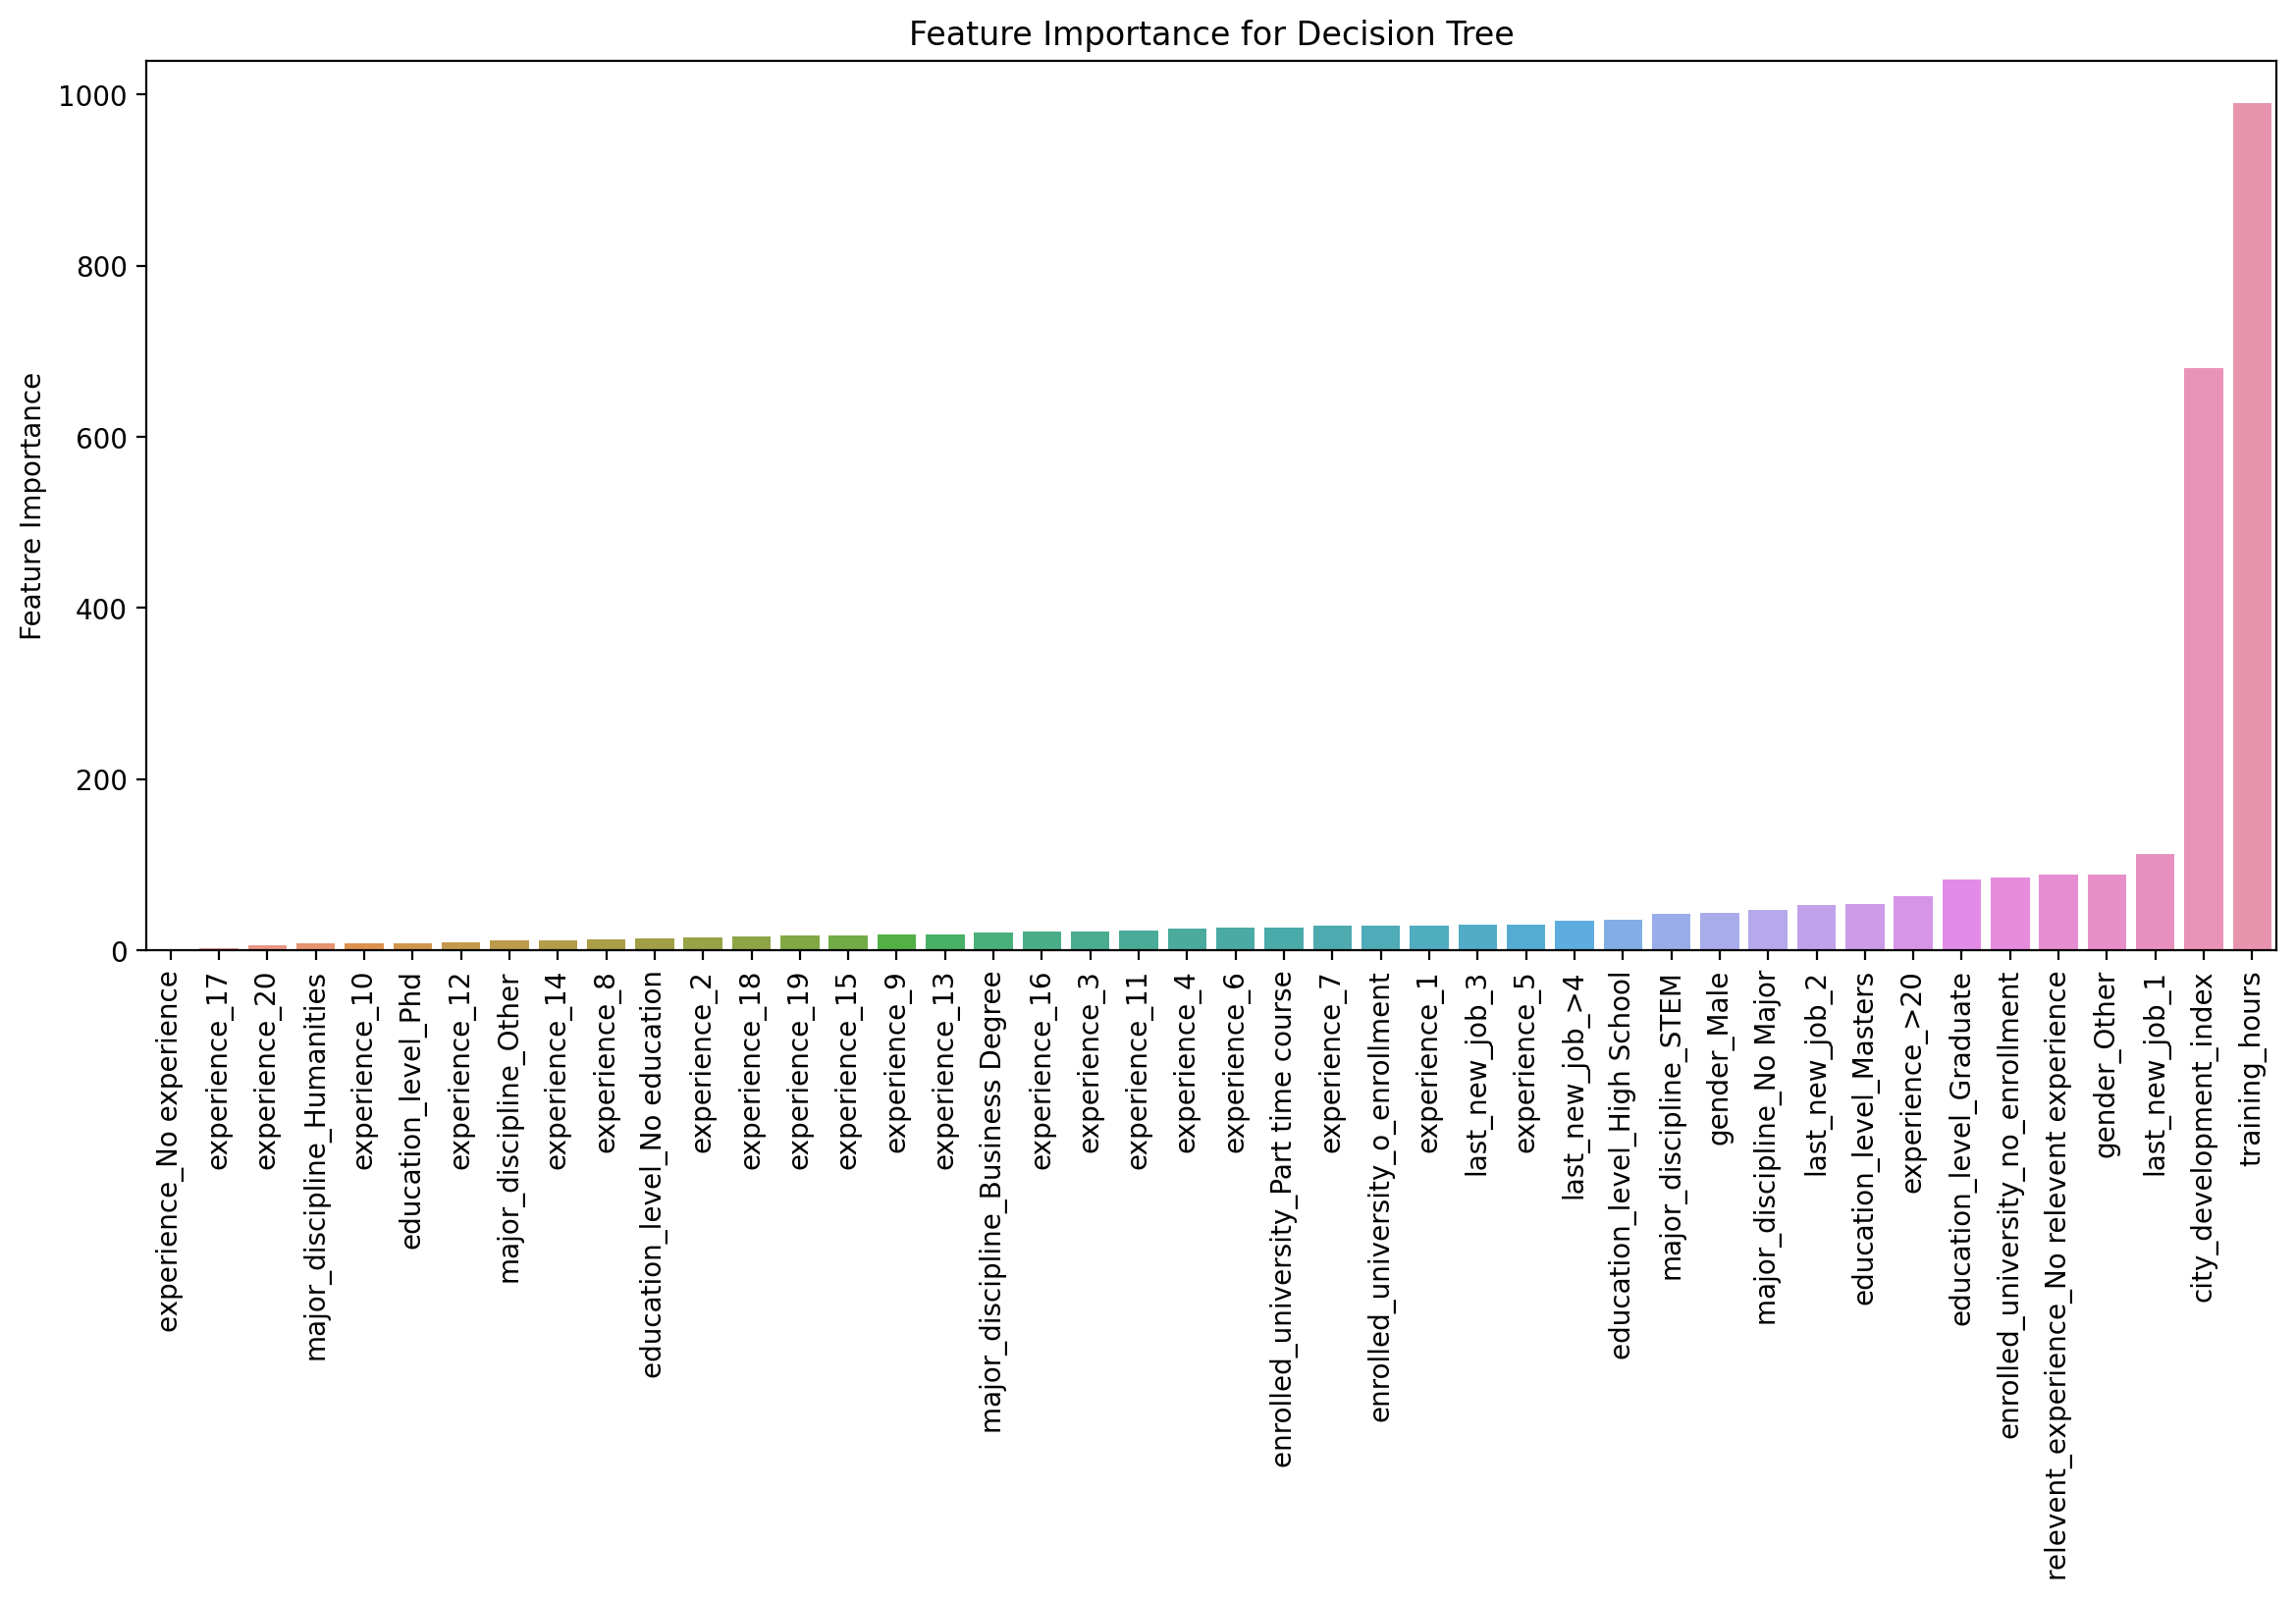

In [447]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

<br>**Comment:** Training hours and city development index are the most effective features. Former experience related features and gender also affects the target value.

<br><br><br>

## 4. Conclusion and Discussion

In this work, we performed classification algorithms to find which candidates really want to work. <b>Logistic Regression, Gaussian Naive Bayes, KNeighbors, SVC, Neural Network (MLP), DecisionTreeClassifier, Random Forests, GradientBoosting, XGBoost, LightGBM, CatBoost</b> and <b>Perceptron</b> algorithms are created and tuned using <b>RandomizedSearchCV</b>. The results are compared to find the best algorithm for this particular dataset. Furthermore, the most effective features for the target value are evaluated.

The models can be further improved by trying different hyperparameters. There are endless hyperparameter options, yet, the processes may take considerably long time. Additionally, <b>GridSearchCV</b> can be used for tuning instead of RandomizedSearchCV to find better hyperparameters, however, it takes much time to process. Lastly, different classification algorithms can be performed.

**See also** Data Cleaning and Imputation processes: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/data-collection-merging-and-cleaning/data-cleaning-for-hr-classification.ipynb